In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV



In [38]:
df = pd.read_csv("realistic_kraljic_dataset.csv")

In [39]:
df

Product_ID       Product_Name Supplier_Region  Lead_Time_Days  \
0         P001     Semiconductors   South America              81   
1         P002     Semiconductors   South America               8   
2         P003        Pharma APIs            Asia              65   
3         P004     Semiconductors   South America              70   
4         P005  Lithium Batteries            Asia              15   
..         ...                ...             ...             ...   
995       P996        Printer Ink          Global              19   
996       P997  Cleaning Supplies          Global              21   
997       P998           Uniforms          Global              70   
998       P999        Printer Ink          Global              44   
999      P1000  Cleaning Supplies          Global              76   

     Order_Volume_Units  Cost_per_Unit  Supply_Risk_Score  \
0                   171         255.03                  5   
1                   763         380.33                  5   
2                   413         385.24                  4   
3                   882         287.64                  5   
4                   120         382.26                  4   
..                  ...            ...                ...   
995               19648          10.20                  2   
996               19143          15.30                  1   
997                5352          30.23                  1   
998               18070          30.73                  1   
999                9018          29.98                  1   

     Profit_Impact_Score  Environmental_Impact Single_Source_Risk  \
0                      5                     4                Yes   
1                      4                     4                Yes   
2                      5                     5                Yes   
3                      5                     5                Yes   
4                      4                     4                Yes   
..                   ...                   ...                ...   
995                    1                     1                 No   
996                    2                     1                 No   
997                    3                     2                 No   
998                    1                     2                 No   
999                    3                     1                 No   

    Kraljic_Category  
0          Strategic  
1          Strategic  
2          Strategic  
3          Strategic  
4          Strategic  
..               ...  
995     Non-Critical  
996     Non-Critical  
997     Non-Critical  
998     Non-Critical  
999     Non-Critical  

[1000 rows x 11 columns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [41]:
df.columns

Index(['Product_ID', 'Product_Name', 'Supplier_Region', 'Lead_Time_Days',
       'Order_Volume_Units', 'Cost_per_Unit', 'Supply_Risk_Score',
       'Profit_Impact_Score', 'Environmental_Impact', 'Single_Source_Risk',
       'Kraljic_Category'],
      dtype='object')

In [42]:
df.head()

Product_ID       Product_Name Supplier_Region  Lead_Time_Days  \
0       P001     Semiconductors   South America              81   
1       P002     Semiconductors   South America               8   
2       P003        Pharma APIs            Asia              65   
3       P004     Semiconductors   South America              70   
4       P005  Lithium Batteries            Asia              15   

   Order_Volume_Units  Cost_per_Unit  Supply_Risk_Score  Profit_Impact_Score  \
0                 171         255.03                  5                    5   
1                 763         380.33                  5                    4   
2                 413         385.24                  4                    5   
3                 882         287.64                  5                    5   
4                 120         382.26                  4                    4   

   Environmental_Impact Single_Source_Risk Kraljic_Category  
0                     4                Yes        Strategic  
1                     4                Yes        Strategic  
2                     5                Yes        Strategic  
3                     5                Yes        Strategic  
4                     4                Yes        Strategic

In [43]:
df.tail()

Product_ID       Product_Name Supplier_Region  Lead_Time_Days  \
995       P996        Printer Ink          Global              19   
996       P997  Cleaning Supplies          Global              21   
997       P998           Uniforms          Global              70   
998       P999        Printer Ink          Global              44   
999      P1000  Cleaning Supplies          Global              76   

     Order_Volume_Units  Cost_per_Unit  Supply_Risk_Score  \
995               19648          10.20                  2   
996               19143          15.30                  1   
997                5352          30.23                  1   
998               18070          30.73                  1   
999                9018          29.98                  1   

     Profit_Impact_Score  Environmental_Impact Single_Source_Risk  \
995                    1                     1                 No   
996                    2                     1                 No   
997                    3                     2                 No   
998                    1                     2                 No   
999                    3                     1                 No   

    Kraljic_Category  
995     Non-Critical  
996     Non-Critical  
997     Non-Critical  
998     Non-Critical  
999     Non-Critical

In [44]:
df['Product_Name'].unique()

array(['Semiconductors', 'Pharma APIs', 'Lithium Batteries', 'AI Chips',
       'Customized Valves', 'Rare Earth Metals', 'Specialty Gases',
       'Catalysts', 'Standard Bolts', 'PVC Pipes', 'Packaging Material',
       'Steel Beams', 'Cleaning Supplies', 'Uniforms', 'Printer Ink',
       'Office Stationery'], dtype=object)

In [45]:
df['Product_Name'].nunique()

16

In [46]:
df.shape 

(1000, 11)

In [47]:
df.isna().max()

Product_ID              False
Product_Name            False
Supplier_Region         False
Lead_Time_Days          False
Order_Volume_Units      False
Cost_per_Unit           False
Supply_Risk_Score       False
Profit_Impact_Score     False
Environmental_Impact    False
Single_Source_Risk      False
Kraljic_Category        False
dtype: bool

In [48]:
df.isna().min()

Product_ID              False
Product_Name            False
Supplier_Region         False
Lead_Time_Days          False
Order_Volume_Units      False
Cost_per_Unit           False
Supply_Risk_Score       False
Profit_Impact_Score     False
Environmental_Impact    False
Single_Source_Risk      False
Kraljic_Category        False
dtype: bool

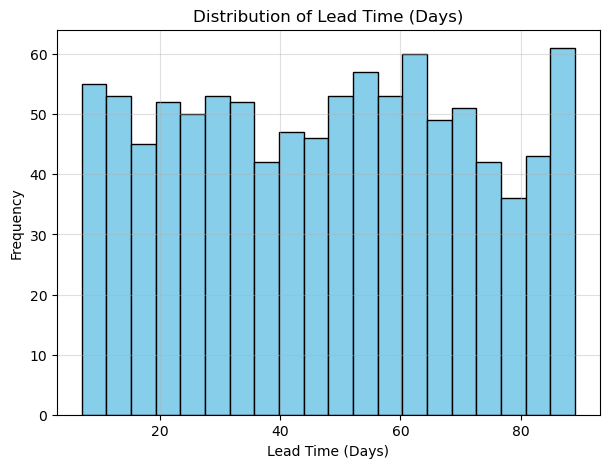

In [49]:
# 1. Histogram of Lead Time

plt.figure(figsize=(7,5))
plt.hist(df["Lead_Time_Days"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Lead Time (Days)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.grid(alpha=0.4)
plt.show()


C:\Users\Shree\AppData\Local\Temp\ipykernel_13192\1397908801.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kraljic_Category", y="Cost_per_Unit", palette="Set2")


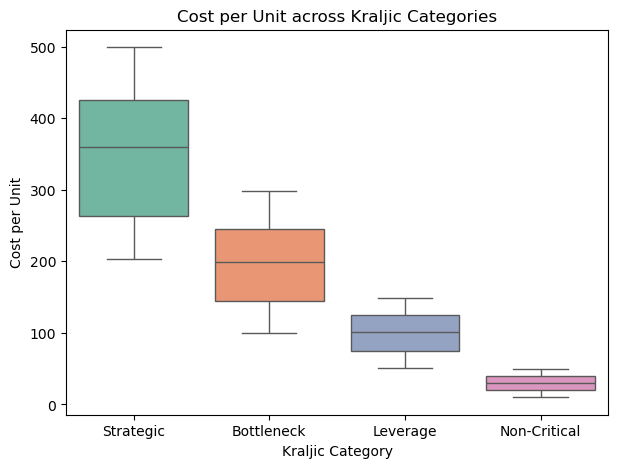

In [50]:
# 2. Boxplot of Cost per Unit by Kraljic Category

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Kraljic_Category", y="Cost_per_Unit", palette="Set2")
plt.title("Cost per Unit across Kraljic Categories")
plt.xlabel("Kraljic Category")
plt.ylabel("Cost per Unit")
plt.show()



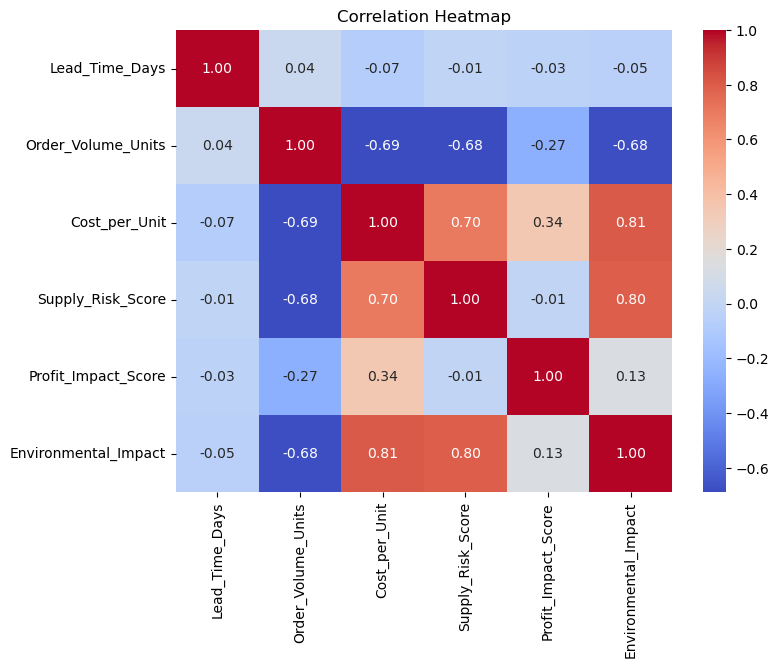

In [51]:
# 3. Correlation Heatmap

plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


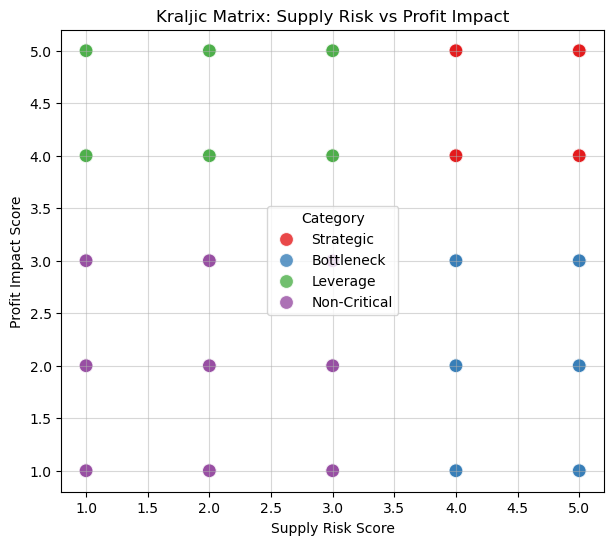

In [52]:
# 4. Scatter Plot (Kraljic Matrix)

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x="Supply_Risk_Score",
    y="Profit_Impact_Score",
    hue="Kraljic_Category",
    palette="Set1",
    s=100,
    alpha=0.8
)
plt.title("Kraljic Matrix: Supply Risk vs Profit Impact")
plt.xlabel("Supply Risk Score")
plt.ylabel("Profit Impact Score")
plt.legend(title="Category")
plt.grid(alpha=0.5)
plt.show()


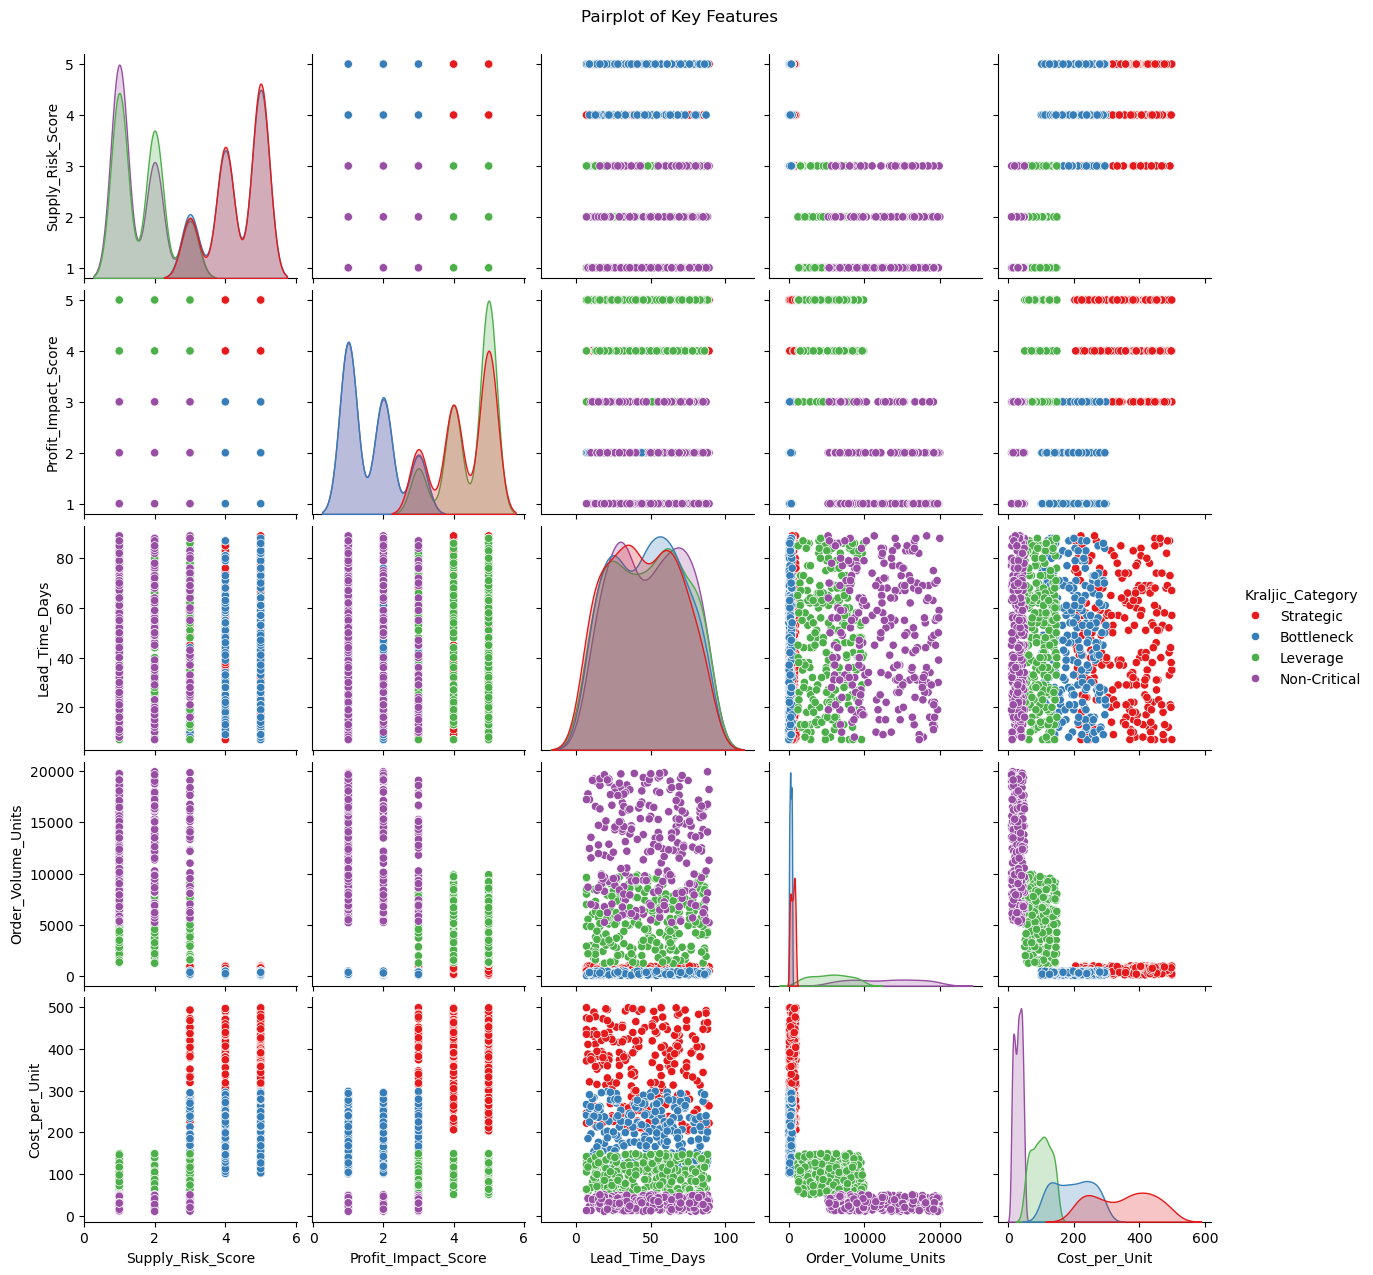

In [53]:
# 5. Pairplot of Key Features

sns.pairplot(df[["Supply_Risk_Score", "Profit_Impact_Score", "Lead_Time_Days",
                 "Order_Volume_Units", "Cost_per_Unit", "Kraljic_Category"]],
             hue="Kraljic_Category", palette="Set1")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


C:\Users\Shree\AppData\Local\Temp\ipykernel_13192\2333192449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Kraljic_Category", palette="pastel")


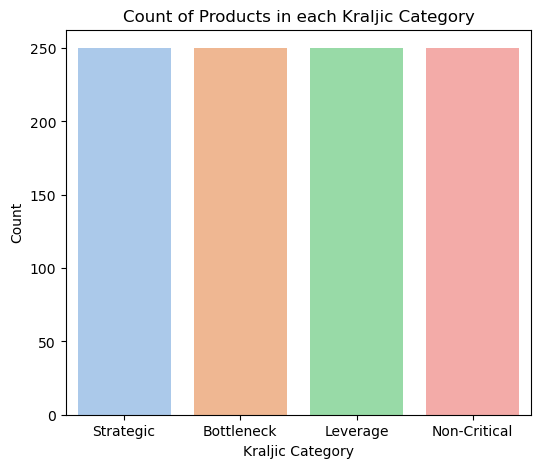

In [54]:
# 6. Countplot of Kraljic Categories

plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Kraljic_Category", palette="pastel")
plt.title("Count of Products in each Kraljic Category")
plt.xlabel("Kraljic Category")
plt.ylabel("Count")
plt.show()



C:\Users\Shree\AppData\Local\Temp\ipykernel_13192\849677332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Kraljic_Category", y="Order_Volume_Units", palette="muted")


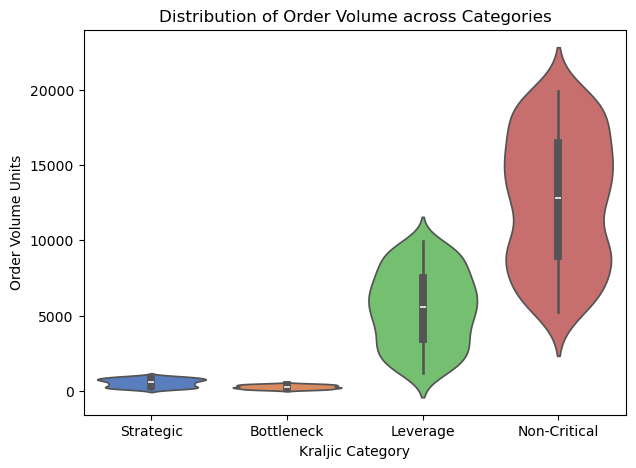

In [55]:
# 7. Violin Plot - Order Volume by Category

plt.figure(figsize=(7,5))
sns.violinplot(data=df, x="Kraljic_Category", y="Order_Volume_Units", palette="muted")
plt.title("Distribution of Order Volume across Categories")
plt.xlabel("Kraljic Category")
plt.ylabel("Order Volume Units")
plt.show()



C:\Users\Shree\AppData\Local\Temp\ipykernel_13192\4136131626.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Supplier_Region", y="Lead_Time_Days", palette="coolwarm", ci=None)
C:\Users\Shree\AppData\Local\Temp\ipykernel_13192\4136131626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Supplier_Region", y="Lead_Time_Days", palette="coolwarm", ci=None)


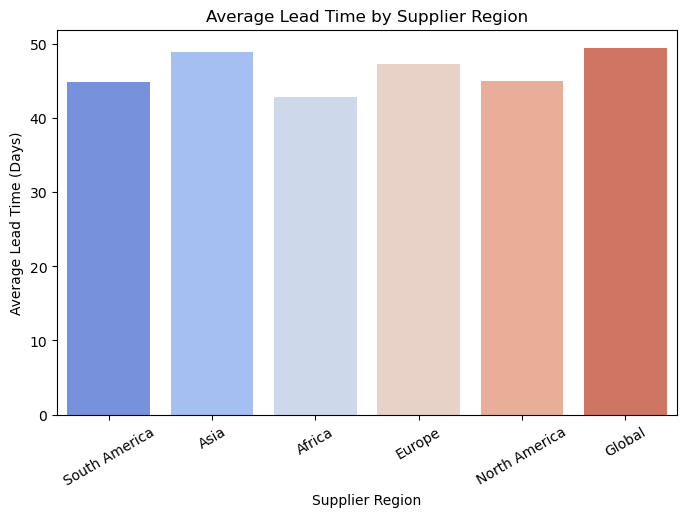

In [56]:
# 8. Barplot - Average Lead Time by Supplier Region

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Supplier_Region", y="Lead_Time_Days", palette="coolwarm", ci=None)
plt.title("Average Lead Time by Supplier Region")
plt.xlabel("Supplier Region")
plt.ylabel("Average Lead Time (Days)")
plt.xticks(rotation=30)
plt.show()



In [57]:
# Features & Target
X = df[["Supply_Risk_Score", "Profit_Impact_Score", "Lead_Time_Days",
        "Order_Volume_Units", "Cost_per_Unit", "Environmental_Impact"]]
y = df["Kraljic_Category"]

In [58]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [59]:
# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [60]:
# Predictions
y_pred = model.predict(X_test)


In [61]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

  Bottleneck       0.98      1.00      0.99        52
    Leverage       1.00      1.00      1.00        55
Non-Critical       1.00      1.00      1.00        49
   Strategic       1.00      0.98      0.99        44

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [62]:
# Features & Target
X = df[["Supply_Risk_Score", "Profit_Impact_Score", "Lead_Time_Days",
        "Order_Volume_Units", "Cost_per_Unit", "Environmental_Impact"]]
y = df["Kraljic_Category"]

In [63]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [64]:
# Train Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [65]:
# Predictions
y_pred = model.predict(X_test)


In [66]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

  Bottleneck       0.98      0.98      0.98        52
    Leverage       1.00      1.00      1.00        55
Non-Critical       1.00      1.00      1.00        49
   Strategic       0.98      0.98      0.98        44

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [67]:
# Features & Target
X = df[["Supply_Risk_Score", "Profit_Impact_Score", "Lead_Time_Days",
        "Order_Volume_Units", "Cost_per_Unit", "Environmental_Impact"]]
y = df["Kraljic_Category"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Model
model =  LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

  Bottleneck       0.87      0.90      0.89        52
    Leverage       0.98      0.96      0.97        55
Non-Critical       0.96      0.98      0.97        49
   Strategic       0.88      0.84      0.86        44

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
